In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Gold.csv')
df.head(5)

,Date,Open,Close,High,Low
0,3/26/2024,2172.68,2179.12,2199.88,2167.97
1,3/25/2024,2166.82,2172.30,2181.00,2163.97
2,3/24/2024,0.00,2165.99,2167.89,2165.30
3,3/23/2024,2165.40,2165.40,2165.40,2165.40
4,3/22/2024,2181.34,2165.40,2186.05,2157.45


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df

,Date,Open,Close,High,Low
1693,2019-03-01,1314.460,1292.765,1315.105,1290.355
1692,2019-03-02,1292.765,1292.765,1292.765,1292.765
1691,2019-03-03,1292.765,1292.765,1292.765,1292.765
1690,2019-03-04,1295.910,1286.710,1297.105,1283.160
1689,2019-03-05,1287.410,1287.775,1289.550,1281.460
...,...,...,...,...,...
4,2024-03-22,2181.340,2165.400,2186.050,2157.450
3,2024-03-23,2165.400,2165.400,2165.400,2165.400
2,2024-03-24,0.000,2165.990,2167.890,2165.300
1,2024-03-25,2166.820,2172.300,2181.000,2163.970


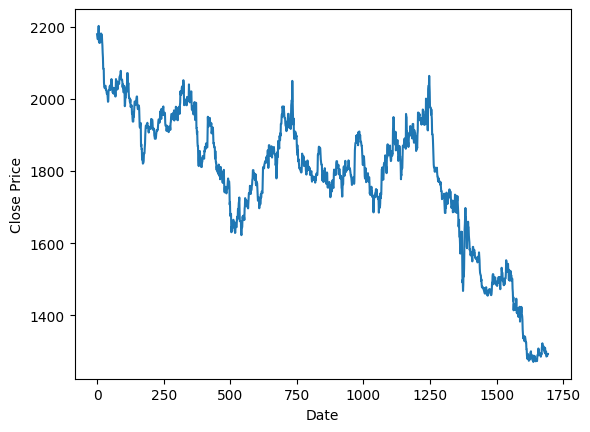

In [4]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [5]:
df = df[['Close']]
df = df.reset_index(drop=True)
df.head(5)

,Close
0,1292.765
1,1292.765
2,1292.765
3,1286.710
4,1287.775


In [6]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [7]:
# Chia train test theo tỉ lệ 8:2
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
train_data

array([[0.02374   ],
       [0.02374   ],
       [0.02374   ],
       ...,
       [0.77770383],
       [0.78863185],
       [0.7760614 ]])

In [9]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [10]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [11]:
X_test

array([[0.78797703, 0.7640921 , 0.7640921 , ..., 0.76371639, 0.73831786,
        0.75911116],
       [0.7640921 , 0.7640921 , 0.7640921 , ..., 0.73831786, 0.75911116,
        0.75911116],
       [0.7640921 , 0.7640921 , 0.7714025 , ..., 0.75911116, 0.75911116,
        0.75911116],
       ...,
       [0.80933927, 0.82158768, 0.82158768, ..., 1.        , 0.97744619,
        0.96049595],
       [0.82158768, 0.82158768, 0.82158768, ..., 0.97744619, 0.96049595,
        0.96049595],
       [0.82158768, 0.82158768, 0.81653159, ..., 0.96049595, 0.96049595,
        0.9611293 ]])

In [12]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1324, 30) (1324,)
(308, 30) (308,)


In [13]:
model = SVR()

# Thiết lập phạm vi tốt cho các tham số
C_range = [0.1, 1, 10]  # Thay đổi tại đây
gamma_range = [0.01, 0.1, 1]  # Thay đổi tại đây
kernel_range = ['rbf', 'poly', 'linear', 'sigmoid'] #tạo ra 3 giá trị cho kernel

# Tạo lưới các giá trị tham số
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': kernel_range}

# Thiết lập model với các tham số và số lượng folds cross-validation
model = GridSearchCV(model, param_grid, refit=True, verbose=3, cv=5, scoring='neg_mean_squared_error')

#trong đó:
#clf: model
#param_grid: tham số
#refit: lưu lại model tốt nhất
#verbose: hiển thị thông tin
#cv: số lượng folds cross-validation (chọn 5 folds cross-validation)
#scoring: đánh giá model bằng MSE

#8. Huấn luyện model
model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.039 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.156 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.017 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.006 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.015 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.014 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.001 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=linear;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [14]:
model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

In [15]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [16]:
y_pred

array([2003.83861152, 1999.72386134, 1997.78939872, 1998.56312878,
       1999.23207021, 1997.42174062, 1986.22389936, 1981.69801225,
       1977.84469307, 1974.526443  , 1970.59938182, 1974.79742995,
       1977.2380187 , 1983.79799803, 1977.97903803, 1972.50962653,
       1970.80694768, 1970.61432748, 1971.32199244, 1962.78911206,
       1969.02057099, 1968.61308227, 1971.1969426 , 1970.70945837,
       1971.22944574, 1966.91714179, 1962.42982169, 1965.30941786,
       1964.82338073, 1964.12816031, 1965.54223429, 1966.88691602,
       1961.07763817, 1958.78825677, 1947.01673029, 1945.89971702,
       1944.04071369, 1942.53659103, 1942.93203464, 1939.56422353,
       1939.09698394, 1935.51660225, 1939.05655465, 1937.29009945,
       1935.52211384, 1935.61416984, 1936.75798525, 1933.87566763,
       1929.23203117, 1931.98111223, 1933.90182817, 1934.91446323,
       1933.99725168, 1937.19131319, 1944.04648337, 1950.11011268,
       1951.82135096, 1953.05001652, 1954.78409503, 1954.84094

In [17]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, y_test)
#MSE
test_mse = mean_squared_error(y_pred, y_test)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.9996163478536976
Testing MSE: 3963803.9471799275
Testing RMSE: 1990.9304224859109


In [18]:
#Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
lags=30
i=0
while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.81653159 0.81572648 0.82004187 0.83060491 0.87273898 0.87273898
 0.87273898 0.90585583 0.92034781 0.94217165 0.9547421  0.97386077
 0.97386077 0.97424722 0.9775106  0.9537867  0.97085503 0.95645966
 0.95031936 0.95031936 0.94927808 0.95587998 0.95312114 1.
 0.97744619 0.96049595 0.96049595 0.9611293  0.96790296 0.97522409]
0 day output 0.9727317882207286
1 day input [0.81572648 0.82004187 0.83060491 0.87273898 0.87273898 0.87273898
 0.90585583 0.92034781 0.94217165 0.9547421  0.97386077 0.97386077
 0.97424722 0.9775106  0.9537867  0.97085503 0.95645966 0.95031936
 0.95031936 0.94927808 0.95587998 0.95312114 1.         0.97744619
 0.96049595 0.96049595 0.9611293  0.96790296 0.97522409 0.97273179]
1 day output 0.9735513300959452
2 day input [0.82004187 0.83060491 0.87273898 0.87273898 0.87273898 0.90585583
 0.92034781 0.94217165 0.9547421  0.97386077 0.97386077 0.97424722
 0.9775106  0.9537867  0.97085503 0.95645966 0.95031936 0.95031936
 0.94927808 0.95587998 0.95312114 1

In [19]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()

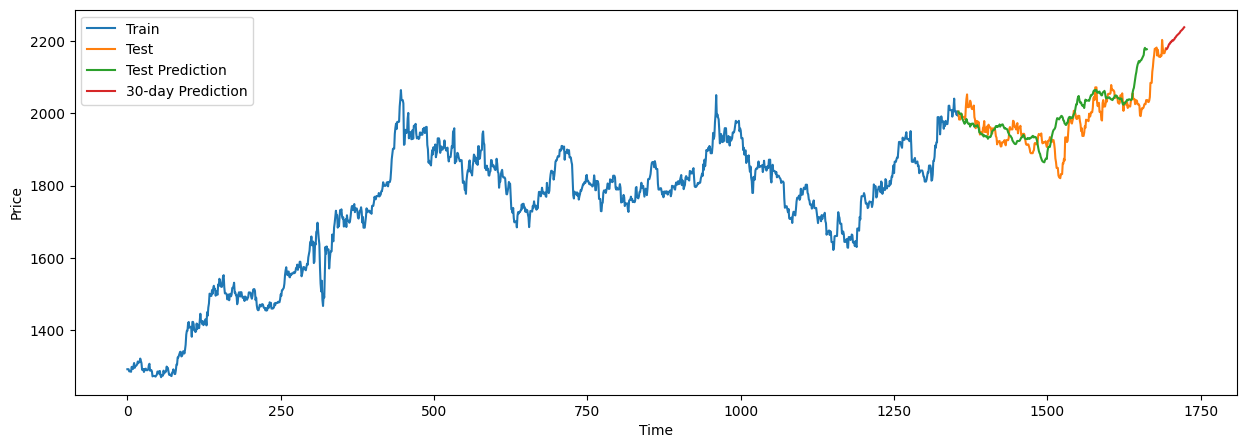

In [20]:
plt.figure(figsize=(15,5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred)

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output)

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Test Prediction', '30-day Prediction'])
plt.show()